In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


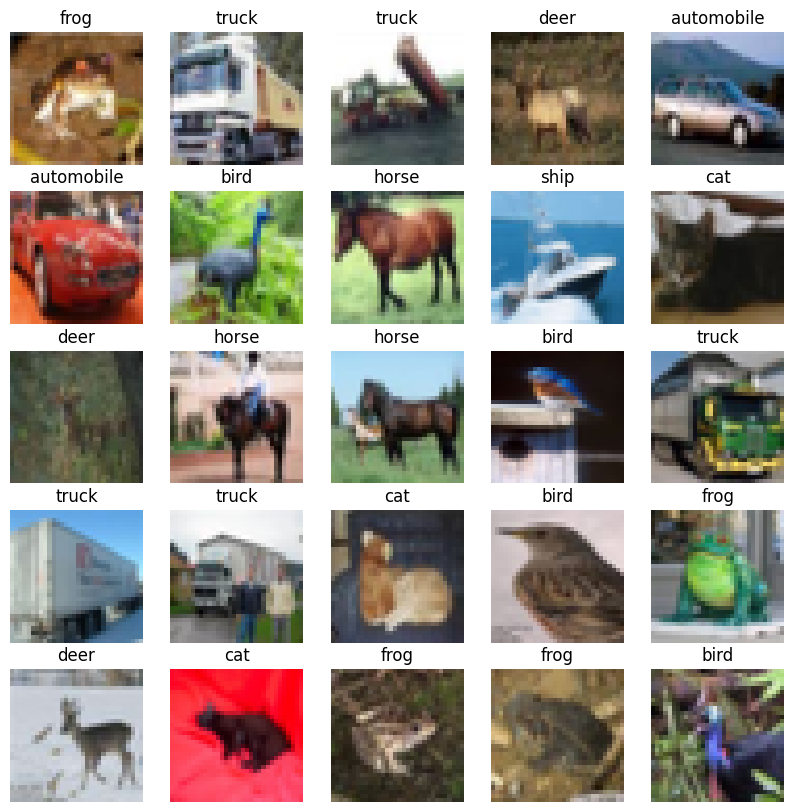

In [ ]:
import matplotlib.pyplot as plt
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.show()

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_images(x_train, y_train, class_names)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load VGG16 model pre-trained on ImageNet, excluding the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the base model
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.4171 - loss: 1.6565 - val_accuracy: 0.5541 - val_loss: 1.2677
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5441 - loss: 1.3017 - val_accuracy: 0.5748 - val_loss: 1.2063
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5658 - loss: 1.2454 - val_accuracy: 0.5841 - val_loss: 1.1866
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5712 - loss: 1.2160 - val_accuracy: 0.5858 - val_loss: 1.1774
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5839 - loss: 1.1856 - val_accuracy: 0.5986 - val_loss: 1.1457
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.5898 - loss: 1.1671 - val_accuracy: 0.5808 - val_loss: 1.1743
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5947 - loss: 1.1572 - val_accuracy: 0.6066 - val_loss: 1.1311
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6038 - loss: 

In [ ]:
# Make predictions
predictions = model.predict(x_test)

# Convert predictions to class labels
predicted_labels = tf.argmax(predictions, axis=1).numpy()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


313/313 - 2s - 6ms/step - accuracy: 0.6028 - loss: 1.1241
Test accuracy: 0.6028000116348267
Classification Report:
              precision    recall  f1-score   support

    airplane       0.70      0.66      0.68      1000
  automobile       0.68      0.66      0.67      1000
        bird       0.51      0.55      0.53      1000
         cat       0.44      0.41      0.42      1000
        deer       0.55      0.54      0.55      1000
         dog       0.51      0.57      0.54      1000
        frog       0.59      0.72      0.65      1000
       horse       0.76      0.54      0.63      1000
        ship       0.73      0.71      0.72      1000
       truck       0.61      0.67      0.64      1000

    accuracy                           0.60     10000
   macro avg       0.61      0.60      0.60     10000
weighted avg       0.61      0.60      0.60     10000



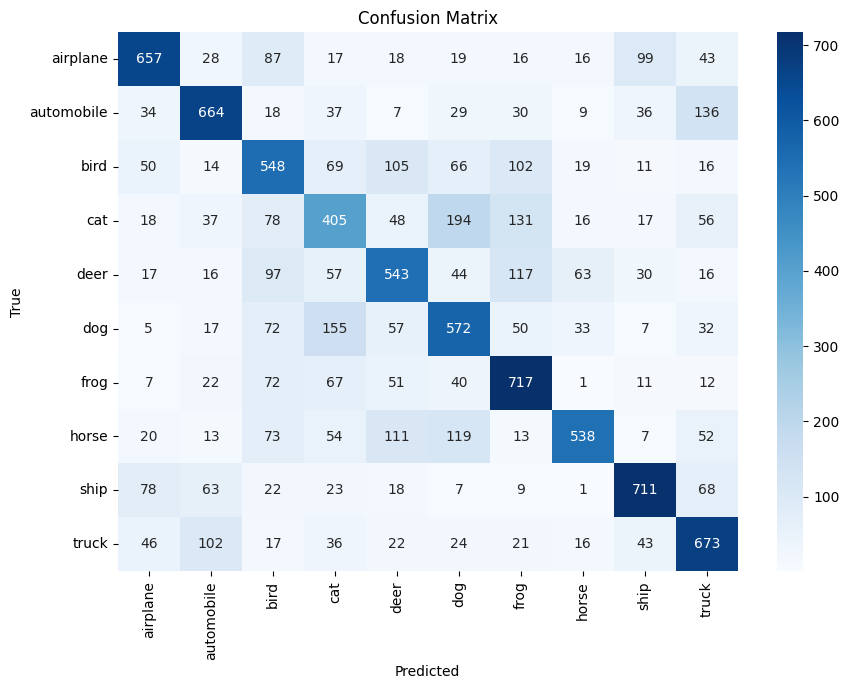

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate performance metrics
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, predicted_labels, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()